## Blockchain

#### Definición del bloque

In [1]:
import hashlib
from hashlib import sha256
import json

# Eslabones de la cadena
class Block():
    def __init__(self, index, transactions, timestamp, previous_hash):
        """
        Constructor for a 'Block' class.
        : param index: The unique ID number of a block
        : transactions: List of transactions
        : timestamp: Block creatiom time
        : previous_hash: Contains the hash value of the preceding block in the chain
        """
        self.index = index
        self.transactions = transactions
        self.timestamp = timestamp
        self.previous_hash = previous_hash
        self.current_hash = None
        self.nonce = None
        
    def compute_hash(self):
        """
        Converts the block object into a JSON string and then returns the hash value
        """
        block_string = json.dumps(self.__dict__, sort_keys = True)
        final_hash = hashlib.sha256(block_string.encode()).hexdigest()
        
        return final_hash

In [2]:
bloque = Block(1,2,3,4)
bloque.compute_hash()

'cf87ec7aacb4531088de9ead28b5554700ed2735132021264395bd01fb1fa9b4'

#### Definición de la cadena

In [3]:
import time
import json

class Blockchain():
    def __init__(self, difficulty=2):
        
        self.unconfirmed_transactions = []
        self.chain = []
        self.create_genesis_block()
        self.difficulty =  difficulty # for the POW algorithm
        
    def create_genesis_block(self):
        
        genesis = Block(0, [], time.time(), "0")
        genesis.current_hash = genesis.compute_hash()
        self.chain.append(genesis)
        
    def last_block(self):
        return self.chain[-1] #last block
    
    def proof_of_work(self, block):
        
        block.nonce = 0
        generated_hash =  block.compute_hash()
        patron = '0' * self.difficulty
        
        start =  time.time()
        while not generated_hash.startswith(patron):
            block.nonce +=1
            generated_hash = block.compute_hash()
        end = time.time()
        total_time =  end-start
            
        return generated_hash, total_time
        
    def is_valid_proof(self, block, block_hs):
        patron = '0' * self.difficulty
        
        if not block_hs.startswith(patron):
            return False
        
        computed_hash = block.compute_hash()
        if computed_hash != block_hs:
            return False
        
        return True
    
    def append_block(self, newblock, newblock_hs):
        
        if (newblock.previous_hash != self.last_block().current_hash):
            return False
        
        if (self.is_valid_proof(newblock, newblock_hs) != True):
            return False
        
        newblock.current_hash = newblock_hs
        self.chain.append(newblock)
        
        return True
    
    def add_new_transaction(self, transaccion):
        
        self.unconfirmed_transactions.append(transaccion)
        
    def mine(self):
        
        if not self.unconfirmed_transactions:
            return False
        
        new_block = Block(index = self.last_block().index + 1,
                          transactions =  self.unconfirmed_transactions,
                          timestamp =  time.time(),
                          previous_hash = self.last_block().current_hash)
        
        proof, tot_time = self.proof_of_work(new_block)
        self.append_block(new_block, proof)
        self.unconfirmed_transactions.clear()
        
        return new_block.index

In [4]:
blockchain = Blockchain(difficulty=4)
blockchain.last_block().__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1713779574.9279058,
 'previous_hash': '0',
 'current_hash': '2d22cf67012d823ad614a9077b6b396ab34843d5758a76e0496ab63372c61778',
 'nonce': None}

In [5]:
new_index = blockchain.last_block().index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block().current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)

newblock.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1713258648.5525095,
 'previous_hash': '66396e77317e8b5747d2a9c291fbfa3db35419be6a29c12c50fe9b9398657a44',
 'current_hash': None,
 'nonce': None}

In [6]:
Hash, total_time = blockchain.proof_of_work(newblock)
print(Hash)
print(total_time)

00008ecb582c2288f1281e1e1a552d36eedf52cf5c2e1c7497fa2ac321a9d5a6
1.1718077659606934


In [7]:
newblock.nonce

100593

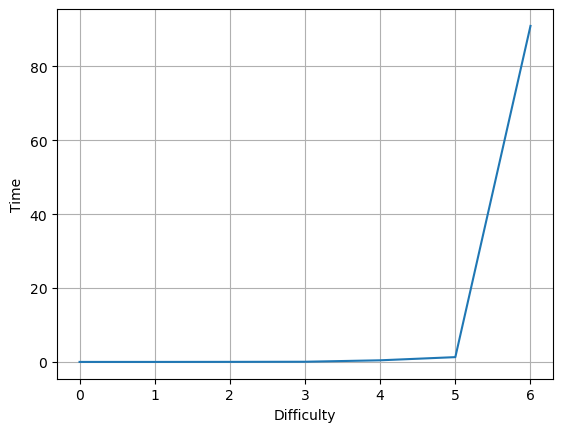

In [8]:
import matplotlib.pyplot as plt

times = []
for i in range(7):
    blockchain = Blockchain(difficulty=i)
    last_block = blockchain.last_block()
    hs, nonce_time = blockchain.proof_of_work(last_block)
    times.append(nonce_time)
    
plt.plot(range(7), times)
plt.xlabel("Difficulty")
plt.ylabel("Time")
plt.grid(True)
plt.show()

#### Minado de bloques

In [5]:
blockchain = Blockchain()
blockchain.last_block().__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1713779579.3984556,
 'previous_hash': '0',
 'current_hash': '938f85250dbce9b15d4bff9d66145103cf4e52d0589548324a73585145fe6e59',
 'nonce': None}

In [6]:
print("Length of the BCh: ", len(blockchain.chain))

Length of the BCh:  1


In [7]:
new_index = blockchain.last_block().index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block().current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)

newblock.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1713779579.7152436,
 'previous_hash': '938f85250dbce9b15d4bff9d66145103cf4e52d0589548324a73585145fe6e59',
 'current_hash': None,
 'nonce': None}

In [8]:
new_hash, tot_time = blockchain.proof_of_work(newblock)
newblock.__dict__
print("Hash of newblock: ", new_hash)

Hash of newblock:  004847d28c01a542391533b736698ad65e8eedb2f7bc666cf82ed42f0859d24e


In [9]:
out = blockchain.append_block(newblock, new_hash)
print("Appended: ", out)
blockchain.last_block().__dict__

Appended:  True


{'index': 1,
 'transactions': [],
 'timestamp': 1713779579.7152436,
 'previous_hash': '938f85250dbce9b15d4bff9d66145103cf4e52d0589548324a73585145fe6e59',
 'current_hash': '004847d28c01a542391533b736698ad65e8eedb2f7bc666cf82ed42f0859d24e',
 'nonce': 192}

In [10]:
blockchain.add_new_transaction("data1")
blockchain.add_new_transaction("data2")
blockchain.add_new_transaction("data3")

In [11]:
blockchain.unconfirmed_transactions

['data1', 'data2', 'data3']

In [12]:
new_index = blockchain.mine()
print(new_index) #The position of the new block in the chain

2


In [13]:
print("Length of the BCh: ", len(blockchain.chain))

Length of the BCh:  3


In [14]:
blockchain.last_block().__dict__

{'index': 2,
 'transactions': [],
 'timestamp': 1713779580.4346123,
 'previous_hash': '004847d28c01a542391533b736698ad65e8eedb2f7bc666cf82ed42f0859d24e',
 'current_hash': '004fba67a405c64becb6701ffbbcf661be4de56dd7e5d3a045c25116c3dd7f58',
 'nonce': 1130}

#### Chequeo de la cadena 

In [15]:
def check_chain(chain):
    
    # for each block in the cahin
    for i,b in enumerate(chain):
        
        # El genesis tiene un current_hash que no empieza por el patron (ignorar el genesis?)
        current_hs = b.current_hash
        delattr(b, 'current_hash')
        
        if i>0 and not blockchain.is_valid_proof(b, current_hs):
            return False
        
        # i>0 to check if the block is not the genesis
        if i>0 and b.previous_hash != bch.chain[b.index - 1].current_hash:
            return False
        
        b.current_hash =  current_hs
        return True

In [16]:
chain_to_check = blockchain.chain
check_chain(chain_to_check)

True

#### Definición del API REST: Inserción de transacciones. 

In [17]:
from flask import Flask, jsonify, request
import pandas as pd

app = Flask(__name__)
peers = set()

@app.route('/api/v1.0/new_transaction', methods=['POST'])
def new_transaction():
    
    data =  request.get_json() 
    
    if 'author' not in data and 'content' not in data:
        return "Invalid transaction data", 404
    
    data['timestamp'] = time.time()
    blockchain.add_new_transaction(data)
    
    return "Success", 201

In [18]:
#if __name__ == '__main__':
#    app.run(port=8000)

In [19]:
blockchain.last_block().__dict__

{'index': 2,
 'transactions': [],
 'timestamp': 1713779580.4346123,
 'previous_hash': '004847d28c01a542391533b736698ad65e8eedb2f7bc666cf82ed42f0859d24e',
 'current_hash': '004fba67a405c64becb6701ffbbcf661be4de56dd7e5d3a045c25116c3dd7f58',
 'nonce': 1130}

#### Definición del API REST: Obtención de la cadena de bloques.

In [20]:
@app.route('/api/v1.0/chain', methods=['GET'])
def chain():
    
    chain_dict = []
    for blok in blockchain.chain:
        chain_dict.append(blok.__dict__)
    
    response = {
        'length': len(chain_dict),
        'chain': chain_dict,
        'peers': list(peers)
    }
    
    return jsonify(response), 200

In [21]:
#if __name__ == '__main__':
#    app.run(port=8000)

#### Definición del API REST: Minado de transacciones. 

In [22]:
@app.route('/api/v1.0/mine', methods=['GET'])
def mine():
    
    result = blockchain.mine()
    
    if (result == False):
        
        return "No new blocks", 404
    
    return "Block #" + str(result) + " mined", 200

In [23]:
#if __name__ == '__main__':
#    app.run(port=8000)

#### Definición del API REST: Transacciones sin confirmar. 

In [24]:
@app.route('/api/v1.0/pending_transactions', methods=['GET'])
def pending_transactions():
        
    return jsonify(blockchain.unconfirmed_transactions), 200

In [25]:
#if __name__ == '__main__':
#    app.run(port=8000)

#### Definición del API REST: Registro de nuevos nodos. 

In [26]:
@app.route('/api/v1.0/register_new_node', methods=['POST'])
def register_new_node():
    
    data =  request.get_json() 
    
    if 'new_node_address' not in data:
        return "Invalid data", 400
    
    new_node_address = data['new_node_address']
    peers.add(new_node_address)
    
    # Start new port
    
    
    return chain()

In [27]:
#if __name__ == '__main__':
#    app.run(port=8000)

In [28]:
@app.route('/api/v1.0/register_with_existing_node', methods=['POST'])
def register_with_existing_node():
    
    data =  request.get_json() 
    
    if 'node_address' not in data:
        return "Invalid data", 400
    
    # Direccion nodo existente
    node_address = data["node_address"]
    url = "/api/v1.0/register_new_node"
    
    # Nodo que quereos registrar
    data = {"new_node_address": request.host_url}
    headers = {'Content-Type': "application/json"}
    
    response = requests.post(url, json = data)
    response_data = response.json()
    
    if response.status_code == 200:
        
        response_chain = response_data['chain']
        new_bch = Blockchain()
        
        for i,blok in enumerate(new_bch):
            
            if i>0 and not new_bch.append_block(blok, blok.current_hash):
                return "Fallo al validar la cadena de bloques", 500 
    
        peers.update(response_data["peers"])
        
        return "Registration successful", 200
    
    else:
        
        return response.content, response.status_code

In [1]:
#if __name__ == '__main__':
#    app.run(port=8000)